In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
# pandas is liased as pd
import numpy as np
# nupmy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Python_Videos/KMeans_clustering_using_Nutrient_dataset/nutrient.csv')
# df is a dataframe
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,Food_Item,energy,protein,fat,calcium,iron
0,BEEF BRAISED,340,20,28,9,2.6
1,HAMBURGER,245,21,17,9,2.7
2,BEEF ROAST,420,15,39,7,2.0
3,BEEF STEAK,375,19,32,9,2.6
4,BEEF CANNED,180,22,10,17,3.7


In [24]:
df.shape
# num of rows= 27, num of cols= 6

(27, 6)

#### Handling the null values

In [25]:
df.isnull().sum()

Food_Item    0
energy       0
protein      0
fat          0
calcium      0
iron         0
dtype: int64

#### Checking the data types

In [26]:
df.dtypes

Food_Item     object
energy         int64
protein        int64
fat            int64
calcium        int64
iron         float64
dtype: object

In [27]:
df['Food_Item'].nunique()

27

In [28]:
df['Food_Item'].value_counts()

BEEF BRAISED           1
VEAL CUTLET            1
TUNA CANNED            1
SARDINES CANNED        1
SALMON CANNED          1
PERCH FRIED            1
MACKEREL CANNED        1
MACKEREL BROILED       1
HADDOCK FRIED          1
CRABMEAT CANNED        1
CLAMS CANNED           1
CLAMS RAW              1
BLUEFISH BAKED         1
BEEF TONGUE            1
HAMBURGER              1
PORK SIMMERED          1
PORK ROAST             1
SMOKED HAM             1
LAMB SHOULDER ROAST    1
LAMB LEG ROAST         1
BEEF HEART             1
CHICKEN CANNED         1
CHICKEN BROILED        1
BEEF CANNED            1
BEEF STEAK             1
BEEF ROAST             1
SHRIMP CANNED          1
Name: Food_Item, dtype: int64

#### Selecting the columns for the KMeans clustering

In [29]:
df.columns

Index(['Food_Item', 'energy', 'protein', 'fat', 'calcium', 'iron'], dtype='object')

In [30]:
x = df.iloc[:,1:]
x.head()

,energy,protein,fat,calcium,iron
0,340,20,28,9,2.6
1,245,21,17,9,2.7
2,420,15,39,7,2.0
3,375,19,32,9,2.6
4,180,22,10,17,3.7


### Elbow Method

In [31]:
from sklearn.cluster import KMeans

WCSS
 [428461.742962963, 202489.4227777778, 102432.41490196079, 49338.23708333334, 34409.30304761905, 20998.564696969697, 13976.100833333334, 9796.2755, 7555.0355, 6037.9105, 4548.493]


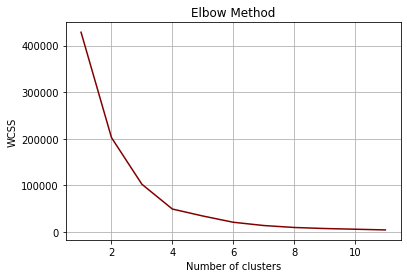

In [32]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,12):  # i=1,2,3,4....,11
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

# model.inertia_ - It returns sum of squared distance between a data point and its closest cluster centroid
# for each and each data point
    
print('WCSS\n',wcss)
plt.plot(list(range(1,12)),wcss,color='maroon')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

### Optimal number of clusters obtained from the Elbow method is 4

#### Applying KMeans at K = 4

In [33]:
k4 = KMeans(n_clusters=4)  # K=4
k4.fit(x)

KMeans(n_clusters=4)

#### Genarate the Predictions

In [34]:
ypred_k4 = k4.predict(x)
print(ypred_k4)

[1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 3 3 3 0 0 3 0 3 2 0 3]


#### Generating the cluster centroids

In [35]:
cent4  = k4.cluster_centers_
print(cent4)

[[174.58333333  21.08333333   8.75        11.83333333   2.08333333]
 [341.875       18.75        28.875        8.75         2.4375    ]
 [180.          22.           9.         367.           2.5       ]
 [ 98.33333333  14.66666667   3.16666667 101.33333333   2.88333333]]


In [36]:
df['Cluster4'] = ypred_k4
df.head()

,Food_Item,energy,protein,fat,calcium,iron,Cluster4
0,BEEF BRAISED,340,20,28,9,2.6,1
1,HAMBURGER,245,21,17,9,2.7,0
2,BEEF ROAST,420,15,39,7,2.0,1
3,BEEF STEAK,375,19,32,9,2.6,1
4,BEEF CANNED,180,22,10,17,3.7,0


In [37]:
df['Cluster4'].value_counts()

0    12
1     8
3     6
2     1
Name: Cluster4, dtype: int64

In [39]:
df[['Cluster4','Food_Item']].sort_values(by='Cluster4')

,Cluster4,Food_Item
13,0,BEEF TONGUE
1,0,HAMBURGER
22,0,PERCH FRIED
20,0,MACKEREL BROILED
4,0,BEEF CANNED
5,0,CHICKEN BROILED
6,0,CHICKEN CANNED
7,0,BEEF HEART
19,0,HADDOCK FRIED
15,0,BLUEFISH BAKED


In [41]:
df.groupby(['Cluster4']).mean()

,energy,protein,fat,calcium,iron
Cluster4,,,,,
0,174.583333,21.083333,8.750000,11.833333,2.083333
1,341.875000,18.750000,28.875000,8.750000,2.437500
2,180.000000,22.000000,9.000000,367.000000,2.500000
3,98.333333,14.666667,3.166667,101.333333,2.883333
